## 결정트리 설명 좀 하기

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 아이리스 데이터를 로딩하고, 학습, 테스트 데이터 셋으로 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state = 11)

# DecisionTreeClassiter 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, \
                feature_names = iris.feature_names, impurity=True, filled=True)

-> graphviz를 이용하여 결정트리의 그래프를 그리기 위해서는 export_graphviz라는 함수를 이용하여 객체를 만들어주어야 한다. export_graphviz는 학습이된 dt_clf를 입력하면 모듈을 읽어서 트리모델을 out_file로 지정된 파일의 dot파일로 만들어주는데 속성으로 타겟네임과 피쳐네임을 입력해주어야 그림이 그려진다


용어

루트 노드(root node) : 맨 꼭대기의 노드
부모 노드(parent node) : 자식노드를 가지는 노드
자식 노드(child node) : 부모가 있는 노드
리프 노드(leaf node) : 자식을 가지지 않는 노드

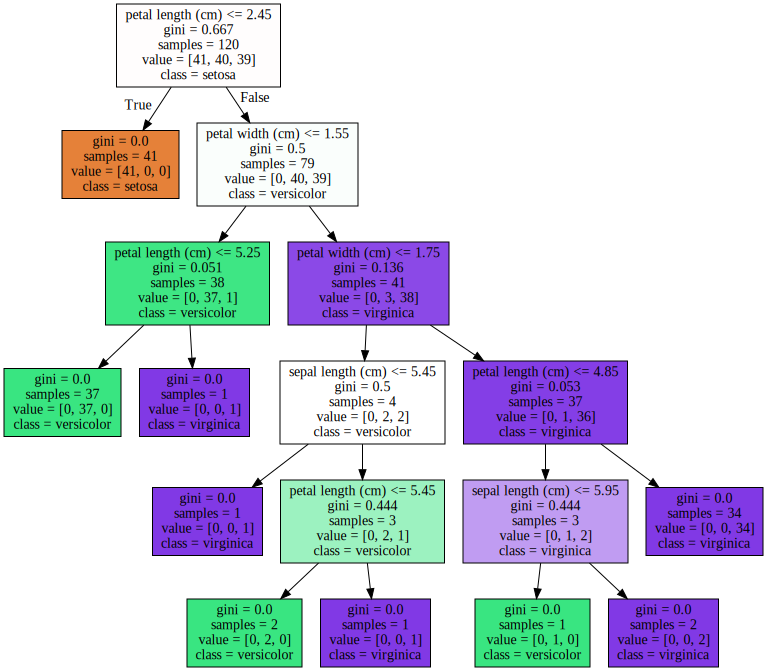

In [10]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

설치했던 graphviz를 불러온 뒤 저장했던 tree.dot 객체를 파일객체로 만든 뒤 Source에 입력해준다.

## 결과 해석

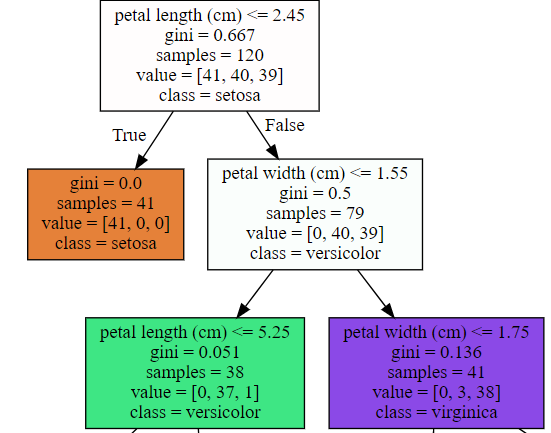

* petal lenght(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건입니다. 이 조건이 없으면 리프노드입니다.

* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수를 말합니다.
* samples는 현 규칙에 해당하는 데이터 건수입니다.
* value=[]는 클래스 값 기반의 데이터 건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며 각각 Setosa, Versicolor, Virginica를 의미합니다. 만일 Value=[41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성되어 있다는 것을 의미합니다.
* class는 value 리스트 내에 가장 많은 건수를 가진 결정값입니다.

Feature importance :
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


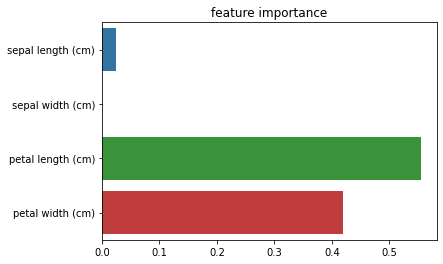

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# feature importance 추출
print('Feature importance :\n{0}' .format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}' .format(name, value))

# feature importance를 column 별로 시각화 하기
plt.title('feature importance')
g = sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)